# Questions 3: Are waterfront properties more expensive?

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import scipy.stats as scs
import numpy as np

In [2]:
df = pd.read_csv('~/flatiron/mod2/dsc-mod-2-project-v2-1-onl01-dtsc-ft-041320/csv/datawithnewcols.csv',index_col=0)

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,-122.319,1690,7639,69,29,True,12.613856,15.150174,12.613856,30.859494
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,-122.233,2720,8062,87,87,False,16.333282,14.375822,14.375822,33.112379
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,-122.393,1360,5000,55,55,True,10.617501,17.522706,10.617501,10.988905
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,-122.045,1800,7503,33,33,False,21.759524,11.683886,11.683886,27.230991
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,-122.005,4760,101930,19,19,True,25.295727,15.508940,15.508940,32.449837


In [4]:
dfwaterfront = df.loc[df['waterfront']==1]

In [5]:
meanwaterfront = dfwaterfront['price'].mean()
medianwaterfront = dfwaterfront['price'].median()

In [6]:
print(f" The mean price of a waterfront property is: {meanwaterfront}")
print(f" The median price of a waterfront property is: {medianwaterfront}")


 The mean price of a waterfront property is: 1122459.7087378642
 The median price of a waterfront property is: 1150000.0


In [7]:
dfnowaterfront = df.loc[df['waterfront']==0]

In [8]:
meannowaterfront = dfnowaterfront['price'].mean()
mediannowaterfront = dfnowaterfront['price'].median()

In [9]:
print(f" The mean price of a property with no waterfront is: {meannowaterfront}")
print(f" The median price of a property with no waterfront is: {mediannowaterfront}")


 The mean price of a property with no waterfront is: 515706.1430234404
 The median price of a property with no waterfront is: 449950.0


In [10]:
waterfront_percentage =round(len(dfwaterfront)/len(dfnowaterfront)*100,2)

In [11]:
print(f" {waterfront_percentage}% of properties in the dataset are on the waterfront")

 0.55% of properties in the dataset are on the waterfront


In [12]:
print(dfwaterfront['price'].median())

1150000.0


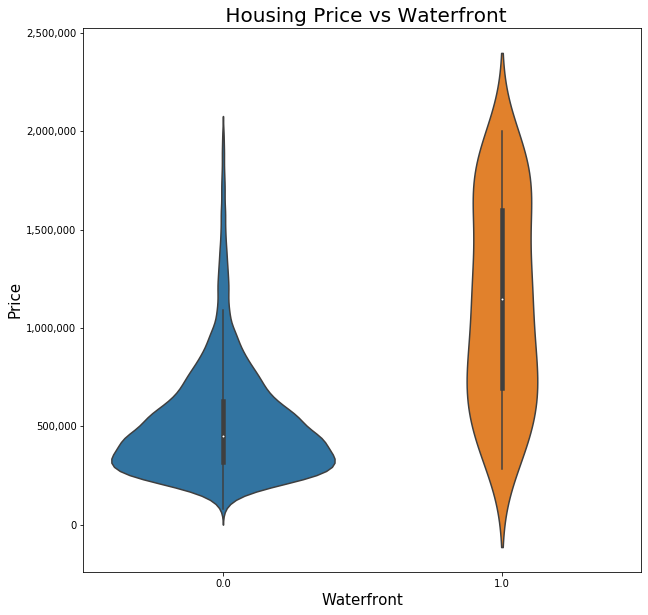

In [13]:

plt.figure(figsize=(10,10))
ax = sns.violinplot(x = 'waterfront', y = 'price', data=df)
ax.set_title(' Housing Price vs Waterfront', fontsize=20)
ax.set_xlabel('Waterfront', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

# Without Outliers - 3 standard deviations

In [14]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]

check_col = ['price']

all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [15]:
df.drop(all_indices, axis=0,inplace = True)

KeyError: '[  273  1010  1513  1589  1878  2033  2103  2244  2505  3843  3857  5494\n  6070  6166  7543  7743  8352  8443  8463  9101  9114  9203  9603  9631\n 10389 10397 10429 11339 11650 12814 12928 13355 14015 14172 14188 14272\n 14313 14475 15838 15848 16288 17035 17128 17538 17590 18036 18061 18607\n 18875 18965] not found in axis'

In [ ]:
df.reset_index(inplace=True)

In [ ]:

plt.figure(figsize=(10,10))
ax = sns.violinplot(x = 'waterfront', y = 'price', data=df)
ax.set_title(' Housing Price vs Waterfront', fontsize=20)
ax.set_xlabel('Waterfront', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

# Conclusion

Yes, it is clear waterfront properties are more expensive

The mean and median price of a waterfront home is  USD1.7m and USD 1.5m respectively.

The mean and median price of a home that is not on the waterfront is USD 532k and USD450k respectively. 

That is a difference of USD 1m between the average home prices of a waterfront and no waterfront property

This massive disparity in price is most likely down to how little waterfrotn proeprties there are, with less than 1% 
of the homes in the dataset having one
